## Title : **E-Learning Program Analysis**

**Objective**: Simulate and analyze a dataset to derive insights about lead demographics and sourcing efficiency for e-learning programs.

### Import Libraries

In [4]:
# Importing the required Libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

### Generate Dataset

Generate the with 10,000+ rows based on the specified structure

In [7]:
# Define the possible values for each column
locations = ["Ahmedabad", "Surat", "Mumbai", "Delhi", "Pune", "Chennai", "Kolkata"]
colleges = ["XYZ University", "ABC Institute", "PQR College", "DEF Academy", "GHI University"]
years_of_study = ["1st", "2nd", "3rd", "4th"]
program_interests = ["Data Science", "Robotics", "AI", "Electric Vehicle", "Web Development"]
lead_sources = ["Instagram", "LinkedIn", "College Collaboration", "Google Form", "Mass-Mailing", "Whatsapp"]

In [8]:
# Generate the dataset
n_rows = 10000
data = {
    "Lead ID": [f"LD{i+1}" for i in range(n_rows)],
    "Location": [random.choice(locations) for _ in range(n_rows)],
    "College": [random.choice(colleges) for _ in range(n_rows)],
    "Year of Study": [random.choice(years_of_study) for _ in range(n_rows)],
    "Program Interest": [random.choice(program_interests) for _ in range(n_rows)],
    "Lead Source": [random.choice(lead_sources) for _ in range(n_rows)]}

In [9]:
# Create DataFrame
df = pd.DataFrame(data)

In [10]:
# Save the dataset to a CSV file
df.to_csv("elearning.csv", index=False)

In [11]:
# Display the first few rows
df.head()

,Lead ID,Location,College,Year of Study,Program Interest,Lead Source
0,LD1,Chennai,XYZ University,3rd,Robotics,Mass-Mailing
1,LD2,Kolkata,GHI University,4th,Electric Vehicle,Whatsapp
2,LD3,Chennai,XYZ University,2nd,Electric Vehicle,Instagram
3,LD4,Chennai,XYZ University,3rd,Robotics,LinkedIn
4,LD5,Mumbai,DEF Academy,4th,Electric Vehicle,LinkedIn


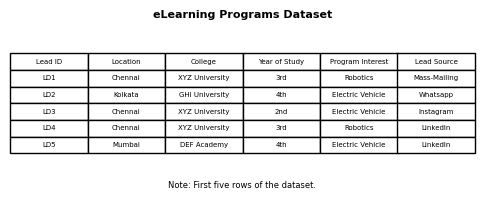

In [12]:
# Get the first five rows
df_head = df.head()

# Plotting the table
fig, ax = plt.subplots(figsize=(6, 2))  
ax.axis('off')  
ax.table(cellText=df_head.values, colLabels=df_head.columns, loc='center', cellLoc='center')

# Save the table as an image
plt.title("eLearning Programs Dataset", fontsize=8, weight='bold')
plt.text(0.5, -0.05, 'Note: First five rows of the dataset.', ha='center', fontsize=6)
plt.savefig('df_head.png', bbox_inches='tight', dpi=300)
plt.show()

### Demographic Analysis

Analyze trends in lead sourcing based on location, college, and year of study

In [15]:
# Count leads by location
location_counts = df["Location"].value_counts()
print("Lead Counts by Location:")
print(location_counts)

Lead Counts by Location:
Location
Ahmedabad    1450
Delhi        1446
Mumbai       1443
Kolkata      1441
Chennai      1419
Pune         1409
Surat        1392
Name: count, dtype: int64


In [16]:
# Count leads by college
college_counts = df["College"].value_counts()
print("\nLead Counts by College:")
print(college_counts)


Lead Counts by College:
College
DEF Academy       2086
ABC Institute     2018
PQR College       2007
XYZ University    1986
GHI University    1903
Name: count, dtype: int64


In [17]:
# Count leads by year of study
year_counts = df["Year of Study"].value_counts()
print("\nLead Counts by Year of Study:")
print(year_counts)


Lead Counts by Year of Study:
Year of Study
2nd    2532
4th    2527
1st    2478
3rd    2463
Name: count, dtype: int64


### Program Analysis

Compare interest levels for various e-learning programs and recommend target demographics

In [20]:
# Count leads by program interest
program_interest_counts = df["Program Interest"].value_counts()
print("Program Interest Counts:")
print(program_interest_counts)

Program Interest Counts:
Program Interest
Electric Vehicle    2047
Robotics            2012
Web Development     1998
AI                  1972
Data Science        1971
Name: count, dtype: int64


In [21]:
# Group by Location and Program Interest
location_program_interest = df.groupby(["Location", "Program Interest"]).size().unstack()
print("\nProgram Interest by Location:")
print(location_program_interest)


Program Interest by Location:
Program Interest   AI  Data Science  Electric Vehicle  Robotics  \
Location                                                          
Ahmedabad         272           240               317       301   
Chennai           323           250               270       274   
Delhi             306           290               284       305   
Kolkata           296           294               269       287   
Mumbai            262           317               292       290   
Pune              271           283               316       267   
Surat             242           297               299       288   

Program Interest  Web Development  
Location                           
Ahmedabad                     320  
Chennai                       302  
Delhi                         261  
Kolkata                       295  
Mumbai                        282  
Pune                          272  
Surat                         266  


### Projections and Predictions

Make data-driven projections about lead conversion rates and suggest budget allocation

In [24]:
# Simulate conversion rates (hypothetical)
conversion_rates = {program: random.uniform(0.1, 0.4) for program in program_interests}
df["Conversion Rate"] = df["Program Interest"].map(conversion_rates)

# Estimate the number of converted leads
df["Estimated Conversions"] = (df["Conversion Rate"] * 100).astype(int)

# Calculate total conversions by program
total_conversions = df.groupby("Program Interest")["Estimated Conversions"].sum()

# Print conversion projections
print("Total Conversions by Program:")
print(total_conversions)

Total Conversions by Program:
Program Interest
AI                  61132
Data Science        37449
Electric Vehicle    32752
Robotics            68408
Web Development     45954
Name: Estimated Conversions, dtype: int32


### Data Preprocessing

In [26]:
# Check for missing values
df.isnull().sum()

Lead ID                  0
Location                 0
College                  0
Year of Study            0
Program Interest         0
Lead Source              0
Conversion Rate          0
Estimated Conversions    0
dtype: int64

In [27]:
# checking duplicate values
df.duplicated().sum()

0

### Presentation of Findings

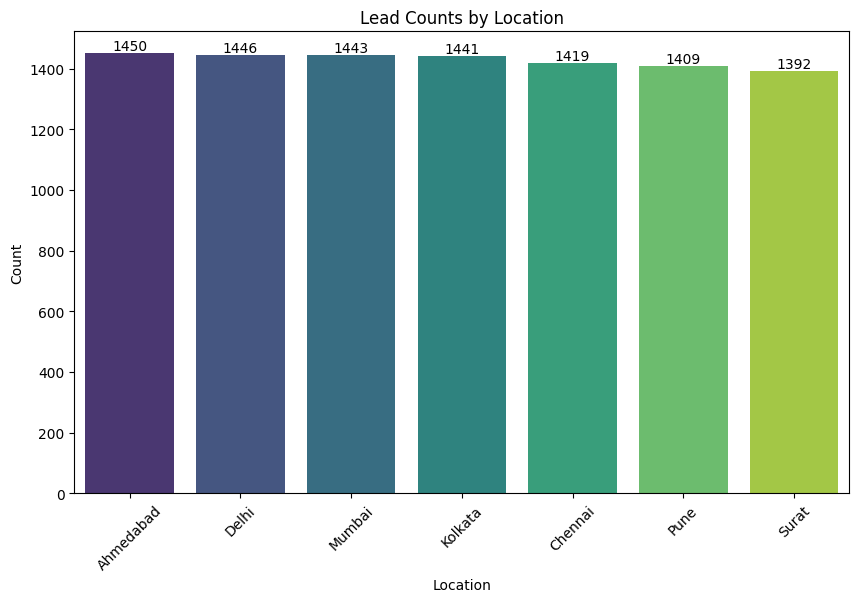

In [29]:
# Plot lead counts by location
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=location_counts.index, y=location_counts.values, palette="viridis")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title("Lead Counts by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('image1.png', bbox_inches='tight', dpi=300)
plt.show()

Note - From above graph, **Surat** is the top city by maximum leads.

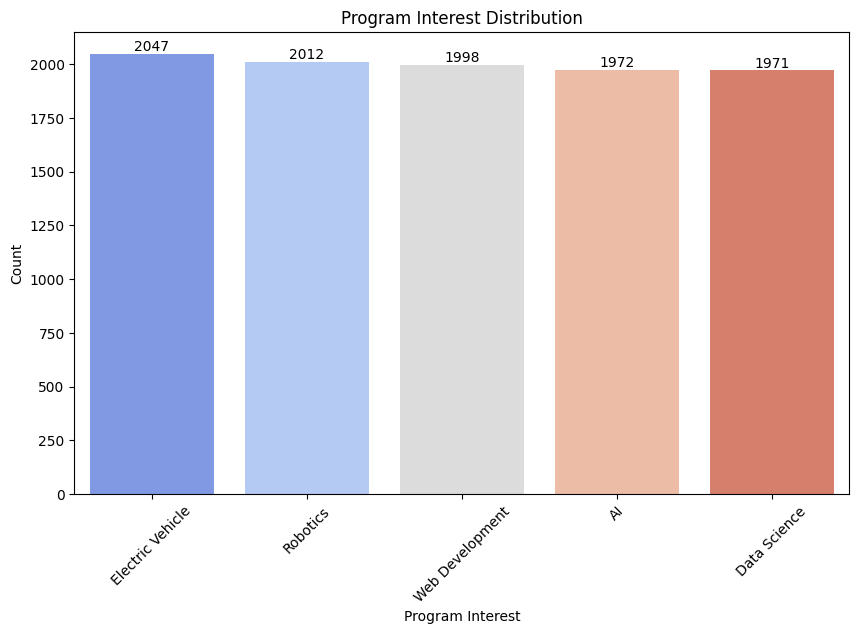

In [31]:
# Plot program interest distribution
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=program_interest_counts.index, y=program_interest_counts.values, palette="coolwarm")
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title("Program Interest Distribution")
plt.xlabel("Program Interest")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.savefig('image2.png', bbox_inches='tight', dpi=300)
plt.show()

Note - From above graph, Maximum leads are interested in **Electric Vehicle**.

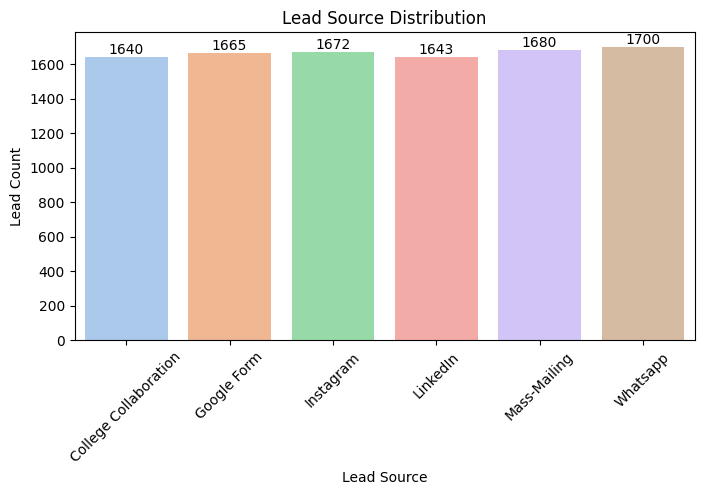

Lead Source Distribution : 
             Lead Source  count of leads
0  College Collaboration            1640
1            Google Form            1665
2              Instagram            1672
3               LinkedIn            1643
4           Mass-Mailing            1680
5               Whatsapp            1700


In [33]:
# plot lead source distribution
lead_source_count = df.groupby('Lead Source')['Lead ID'].count().reset_index(name='count of leads')

plt.figure(figsize=(8,4))
ax = sns.barplot(data=lead_source_count, x='Lead Source', y='count of leads', palette='pastel')
for container in ax.containers:
    ax.bar_label(container, fmt='%d')
plt.title("Lead Source Distribution")
plt.xlabel("Lead Source")
plt.ylabel("Lead Count")
plt.xticks(rotation=45)
plt.savefig('image3.png', bbox_inches='tight', dpi=300)
plt.show()

print("Lead Source Distribution : ")
print(lead_source_count)

### Findings and Recommendations

**Findings** :
1. Surat and Mumbai are the most promising locations for lead generation.
2. Electric Vehicle is the most popular program.
3. Mass-Mailing is the most effective lead source.

**Recommendations** :
1. Focus marketing efforts on Surat and Mumbai.
2. Increase ad spend on Mass-Mailing.
3. Create targeted campaigns for Electric Vehicle.

### Conclusion

Summarize the key outcomes:
* The project successfully simulated and analyzed a large dataset.
* Insights derived can guide targeted marketing strategies and budget allocation.